<a href="https://colab.research.google.com/github/antuness/Deep_Learning_with_Pytorch/blob/main/Exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício Sugerido**

Vamos treinar um classificador linear em duas dimensões.

A célula a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função make_classification() do sklearn.

O trabalho é encontrar os melhores parâmetros (W,b) de um modelo linear para classificar a distribuição gerada. 

O ideal é não fazer por tentativa e erro, mas pretar atenção no impacto de cada mudança realizada. Note que os pesos **W** são componentes angulares do seu modelo, enquanto o viés **b** é o componente linear que desloca a reta no espaço.

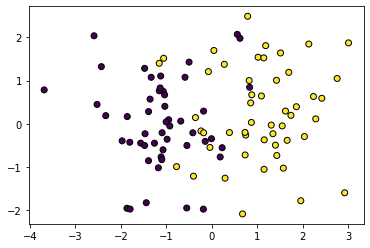

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            edgecolor='k')

## Para não ficar gerando uma distribuição diferente a cada rodada, por isos usamos o numpy
## Usamos o scatter para ele só plotar os pontos, e não as retas

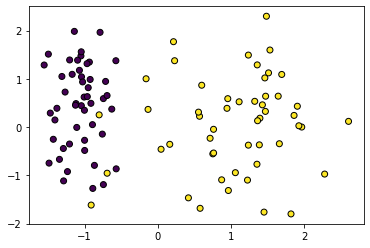

In [4]:
## Quando não usamos o numpy

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            edgecolor='k')

0


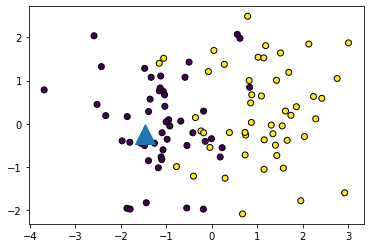

In [15]:
## Testando com um ponto

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

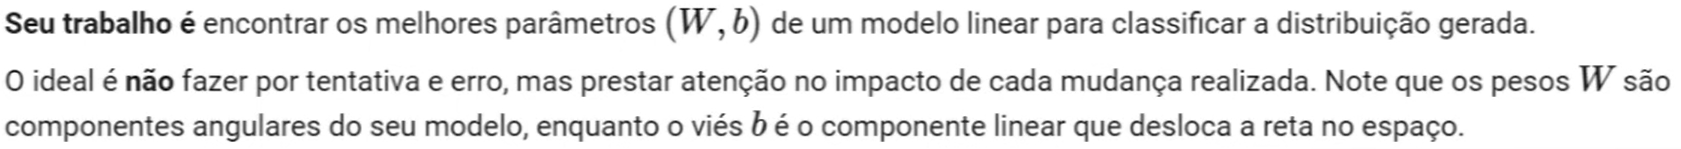

-4.4


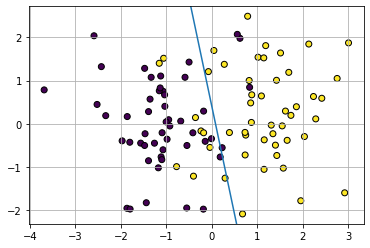

In [16]:
def plotmodel(w1,w2,b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            edgecolor='k')

## vou fizar máximo e mínimo para melhor visualização

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2,4,50)
  y = (-w1*x - b)/w2

  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
b = -0.4 ## se eu mudar, ela muda a reta no espaço
plotmodel(w1,w2,b)

## para eu ter uma visão dos valor + e -
p = (-1,1)
print(w1 * p[0] + w2 * p[1] + b)

Agora podemos utilizar o nosso modelo como um classificador linear com um simples if para avaliar a solução da equação da reta para novos pontos no espaço.

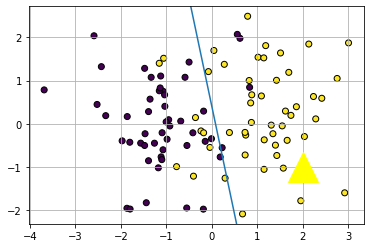

In [18]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (2,-1)
classe, cor = classify(p, w1, w2, b)

plotmodel(w1,w2,b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

De posse da função classify() podemos agora classificar cada um dos pontos gerados aleatoriamenre pelo make_classifucation, calculando assim a acurácia do nosso modelo.

In [23]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos +=1

print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0
